#### Below is the loading of MNIST datasets

In [53]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

X, y = mnist["data"], mnist["target"]
X.shape


### The above output shows that our dataset has dictionary structure. So we proceed and check for the shape

In [54]:
X, y = mnist["data"],mnist["target"]
y.shape

(70000,)

##### Let's take a peek at one item set digit to 4 in the dataset and check what its output could look like

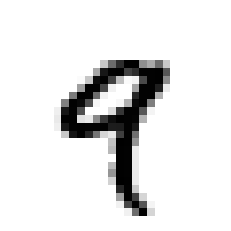

In [55]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X[4]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

#### This look like 9. To be sure let's check the label of that item

In [56]:
y[4]

'9'

##### From the what the output looks like above, it showed that our label are in string data type. We will convert them to int

In [62]:
y=y.astype(np.uint8)
y[4] # you can uncomment the line below and view the entire labels
# y

9

##### Done. So we go ahead and create a train and test split. Note: Mnist had already create a train and test set in ratio of 60000:10000 respectively

In [63]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

##### Let's create a binary classifier that can distinguish between two digit, if our input "is 9 or not 9"

In [68]:
y_train_9 = (y_train == 9) # True for all 5s, False for all other digits.
y_test_9 = (y_test == 9)
y_test_9

array([False, False, False, ..., False, False, False])

##### Now we use a stochastic gradient classifier to use and train a classifier choosen to be SGDClassifier, and fit the classifier with our model

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_9)


#### having done that, let's cross check to see if our model really can predict exact digit we want it to. We expect a boolean result.

In [72]:
sgd_clf.predict([some_digit])


array([ True])

#### Now we go ahead and do a cross validation to check the performance measurement of the model we just created

In [73]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_9):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_9[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_9[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) 

C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9456
0.95195
0.9509


##### From the above code in chosen in place of cross_val_score and used clone with it, we used a stratifiedkfold for our cross validation and clone library to train our fold and test the fold that print 0.9502, 0.96565 and 0.96495

#### Now we decide to use the cross_val_score() function

In [79]:
 from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_9, cv=3, scoring="accuracy")


array([0.9456 , 0.95195, 0.9509 ])

In [80]:
from sklearn.base import BaseEstimator
class Never9Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [82]:
never_9_clf = Never9Classifier()
cross_val_score(never_9_clf, X_train, y_train_9, cv=3, scoring="accuracy")


array([0.8993 , 0.8999 , 0.90335])

##### Now in a bid to use a better performance metrix we want to use confusion metrix. And the prediction function is chosen contrary to score in the previous cross validation

##### So in preparation for the confusion matrix we use cross val prediction because we need to predict first and compare our prediction with the target

In [83]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3)


In [85]:
 from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_9, y_train_pred)


array([[52715,  1336],
       [ 1695,  4254]], dtype=int64)

##### The above output shows the predict value and actual value in columns and rows respectively. The first row (number of non nine digit row) shows true negative and false negative predictions respetively, while the second row (yes nine digit predictions) showed false positive and true positive respectively.

##### Let's call out our precision to show how percentage measure of time it has to detect nine digit in the entire dataset

In [90]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_9, y_train_pred) # 52715 / (52715 + 1336)

0.7610017889087657

In [91]:
#Let call out recall to show percentage number of entire nine digit it correctly detect.

In [92]:
recall_score(y_train_9, y_train_pred) # == 4254 / (4254 + 1695)


0.7150781643973777

In [ ]:
#Check for f1-score. Our model test of performance

In [94]:
from sklearn.metrics import f1_score
f1_score(y_train_9, y_train_pred)


0.737325591472398

##### Let's check for cases where the model can compare between two or more classes. Multiclass classification.

##### Sklearn by default detect other digit using binary classification for multiclass classification except for SVM where it is required to use One versus all. Note: ono stands for one versus one and ova stands for one versus all in the below code.

In [95]:
sgd_clf.fit(X_train, y_train) # y_train, not y_train_5
sgd_clf.predict([some_digit])


array([9], dtype=uint8)

In [96]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-45606.88156161, -20077.79903687, -23620.86693862,
        -11077.35532351,  -8578.08720996,  -7133.8897717 ,
        -27033.93740198,  -8312.88994614,  -3257.29010483,
          2193.22821614]])

In [97]:
np.argmax(some_digit_scores)


9

In [98]:
sgd_clf.classes_


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [99]:
sgd_clf.classes_[9]

9

In [ ]:
#One versus one is used as classifier used to create multi class

In [100]:
 from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])


array([9], dtype=uint8)

In [101]:
len(ovo_clf.estimators_)

45

In [104]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_9, cv=3,
 method="predict_proba")


In [105]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])


array([9], dtype=uint8)

In [106]:
forest_clf.predict_proba([some_digit])


array([[0.  , 0.01, 0.  , 0.  , 0.01, 0.01, 0.  , 0.  , 0.02, 0.95]])

##### Let's evaluate our multiclass classier using cross validation score and see the result we get doing that

In [107]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")


array([0.87365, 0.85835, 0.8689 ])

#### let's use scaling with standard scaler to push for a better result if possible

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
